In [37]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pa

# importing Data - Step 1

In [45]:
trainData = pa.read_csv("G:\Coding Blocks\Documents\Train.csv")
testData = pa.read_csv("G:\Coding Blocks\Documents\Test.csv")
# print(trainData.head(5))
x1 = trainData.values
x1 = x1[:,:5]
print(type(x1),x1.shape)
y1 = trainData.target
y1 = list(y1)
y1 = np.array(y1)
print(type(y1))
print(x1.shape,type(x1))
# x2 = testData.values
# y2 = testData.target
# print(y2.shape,type(y2))

<class 'numpy.ndarray'> (1600, 5)
<class 'numpy.ndarray'>
(1600, 5) <class 'numpy.ndarray'>


# Question 1 : number of features = 5

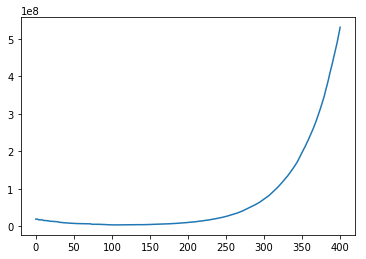

[19609808.662452627, 19603399.60029744, 19603716.811367344, 18303805.13519396, 18292570.377503883, 17665777.379572522, 17625949.207820047, 17626310.744972397, 17635014.77245284, 17475742.649282947, 16043621.821839664, 16042743.507378025, 15976824.808236716, 15916850.658832982, 15449993.995710181, 15449633.648305606, 15276136.27877596, 14713956.824076356, 14336823.30496373, 13851940.590733116, 13841770.243247418, 13814178.965505982, 13751602.288363244, 13399677.866104856, 13206210.442695513, 13201755.321326403, 13219343.44961096, 12832412.714318661, 12647373.586246192, 12586819.801246135, 12270947.755538082, 10976776.087786661, 10978129.66172428, 10943979.986620381, 10597257.127180682, 10303307.797052529, 10272113.901888836, 9886902.970294986, 9902663.637168316, 9878758.672057303, 9751861.768232618, 9307851.54062377, 9171124.427915214, 9123481.107220188, 9131183.28180269, 8927481.845673079, 8797077.543800704, 8734883.730685262, 8615479.686876364, 8257902.673795297, 8117712.04385598, 791

In [65]:
def hypothesis(x,theta):
    result = 0
    result += theta[0]*1 #for multivariate reg we have to use this
    for i in range(0,len(x)):
        result += (theta[i+1])*(x[i])
    return result
    
# theta = [1,2,5,3,4]
# print(hypothesis(1,theta))
        
def error(x,y,theta):
    l = x.shape[0]
    total_e = 0
    for i in range(l):
        h = hypothesis(x[i],theta)
        e = (y[i] - h)**2
        total_e += e
    return total_e

def gradient(x,y,theta):
    m = x.shape[0]
    grad =  np.zeros((len(theta),))
    for i in range(m):
        grad[0] += (hypothesis(1,theta) -y[i])
        for j in range(1,len(theta)):
            grad[i] += (hypothesis(x[i],theta) - y[i])*x[i]
    return grad

def batch_gradient(x,y,theta,batch_size = 1):
    m = y.shape[0]
    grad =  np.zeros((len(theta),))
    indices = np.arange(m)
    np.random.shuffle(indices) ## VERY IMPORTANT IT MAKES CHANGES TO INDICES ITSELF INSTEAD OF RETURNING NEW INDICES
    indices = indices[:batch_size]
    for i in indices:
        grad[0] += (hypothesis(x[i,],theta) -y[i])
        for j in range(0,len(theta)-1):
            grad[j+1] += (y[i] -hypothesis(x[i,],theta))*x[i,j]
    return grad

def grad_descent(x,y,learning_rate = 0.01):
    m = x.shape[1]
    m+=1
    theta = np.zeros((m,))
    e = error(x,y,theta)
    de = e
    err_list = [e]
    itr = 1
    while (itr<=400):
        grad = batch_gradient(x,y,theta)
        theta = theta + learning_rate*grad
        ne = error(x,y,theta)
        err_list.append(ne)
        de = ne - e
        e = ne
        itr+=1
    return theta,err_list

theta,e = grad_descent(x1,y1)
pp.plot(e)
pp.show()
print(e)
print(theta)
        
    